In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('./car+evaluation/car.data', header=None)
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot','safety','Class']
data

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data.keys()

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
data['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

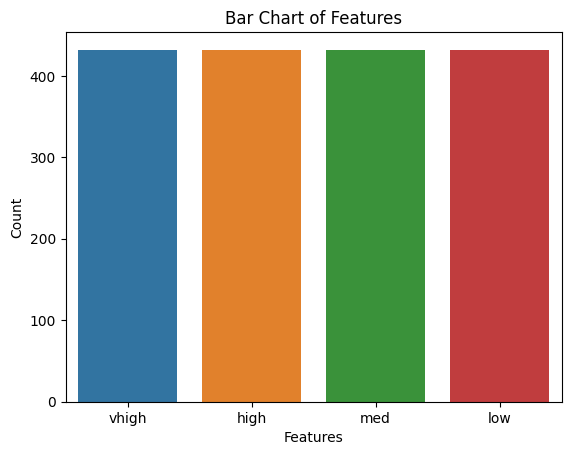

In [7]:
sns.countplot(x = data['buying'])
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Bar Chart of Features')
plt.show()

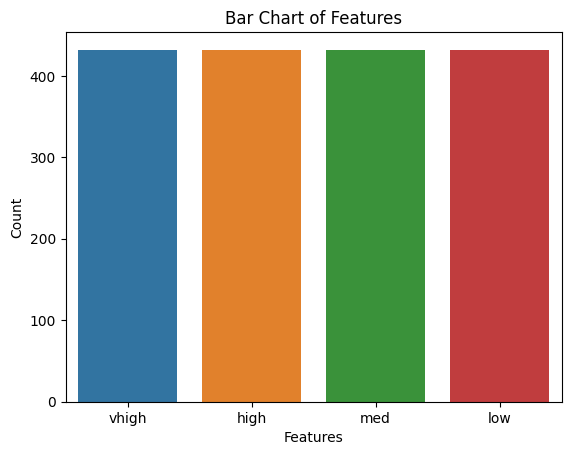

In [8]:
sns.countplot(x = data['maint'])
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Bar Chart of Features')
plt.show()

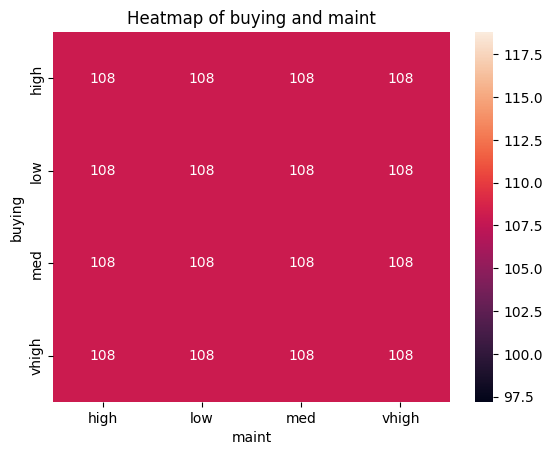

In [9]:
# Heatmap 그리기
heatmap_data = pd.crosstab(data['buying'], data['maint'])
sns.heatmap(heatmap_data, annot=True, fmt='d')
plt.xlabel('maint')
plt.ylabel('buying')
plt.title('Heatmap of buying and maint')
plt.show()

In [10]:
missing_values = data.isnull().sum()
missing_values

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [11]:
encoded_data = pd.get_dummies(data, columns=['buying', 'maint', 'doors', 'persons', 
                                             'lug_boot','safety'])
encoded_data

,Class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,vgood,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,unacc,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


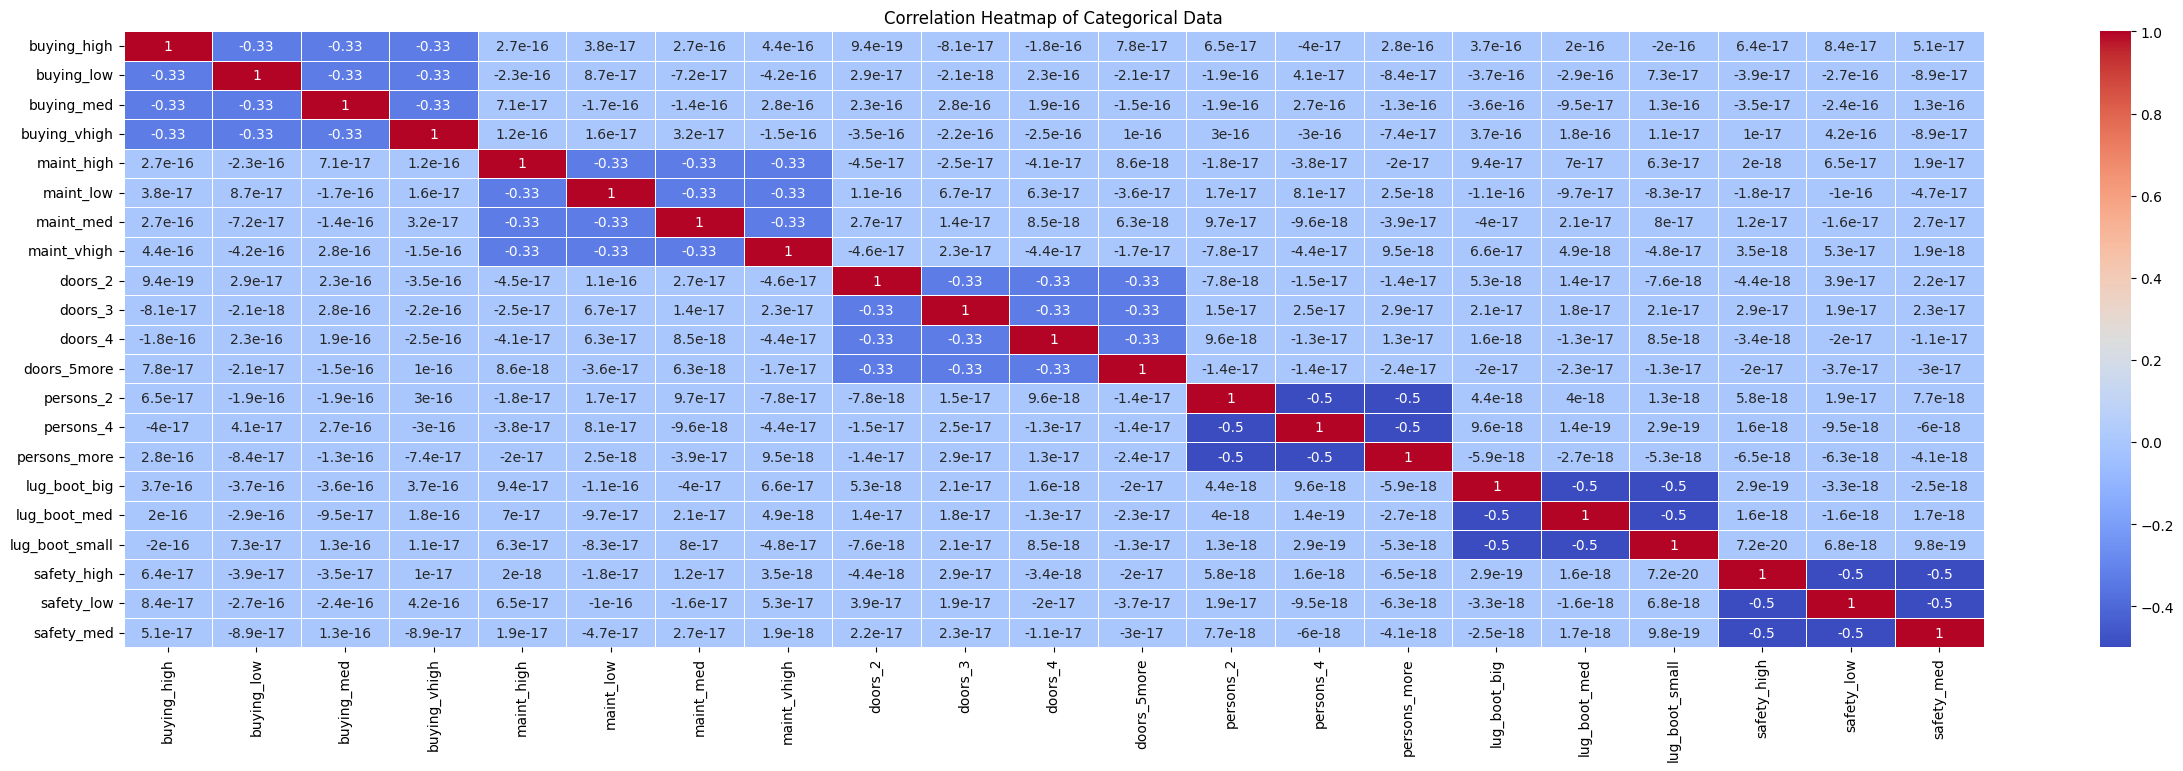

In [12]:
# 상관 관계 행렬 생성
correlation_matrix = encoded_data.iloc[:,1:].corr()

# 히트맵 그리기
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Categorical Data')
plt.show()

In [13]:
X = encoded_data.drop('Class', axis=1)
y = encoded_data['Class']

Accuracy: 0.9566473988439307


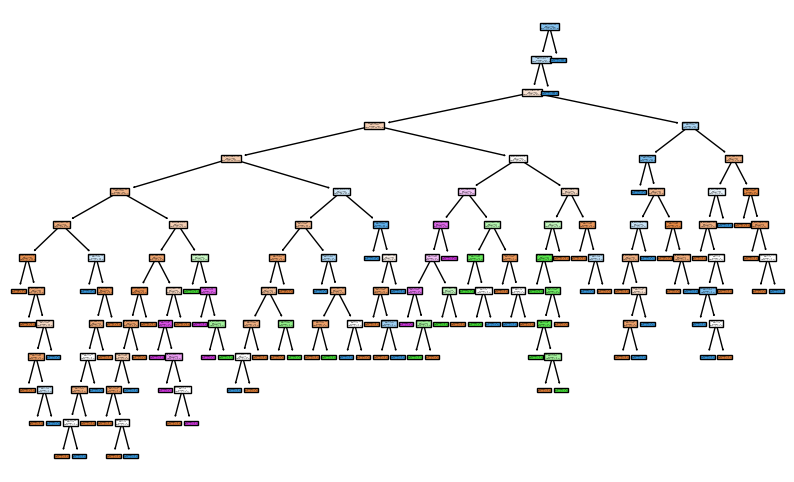

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

# 모델 성능 평가
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

plt.figure(figsize=(10, 6))
plot_tree(clf1, filled=True, feature_names=X.columns)
plt.show()

In [15]:
clf2 = SVC()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.9682080924855492


In [16]:
clf3 = LogisticRegression()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 0.9161849710982659


Accuracy: 0.9624277456647399


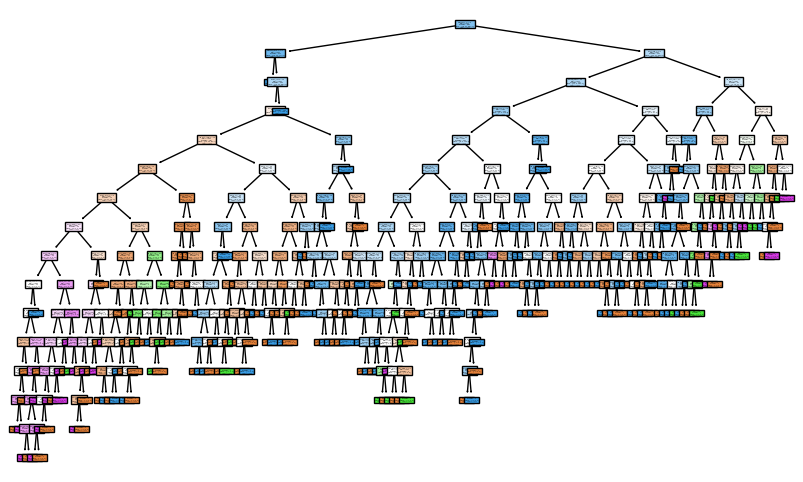

In [17]:
clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

estimator = clf4.estimators_[0]  # 첫 번째 결정 트리 선택
plt.figure(figsize=(10, 6))
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=data.Class)
plt.show()